In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
#create an empty list to collect all reviews
reviews  = []

#create an empty list to collect rating stars
stars = []

#create an empty list to collect date
date = []


In [34]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Create empty lists to collect data
reviews = []
stars = []
date = []
country = []

# Iterate through pages
for i in range(1, 31):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")

    soup = BeautifulSoup(page.content, "html5")

    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)

    for item in soup.find_all("div", class_="rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")

    # Date
    for item in soup.find_all("time"):
        date.append(item.text)




In [36]:
len(reviews)
stars = stars[:3000]
len(stars)

3000

In [82]:

# Creating a DataFrame
df = pd.DataFrame({
    'reviews': reviews,
    'stars': stars,
    'date': date,
})

# Drop rows with missing values in 'Stars', 'Review', or 'Date'
df = df.dropna(subset=['stars', 'reviews', 'date'])

# Add an "id" column
df['id'] = df.reset_index().index + 1

# Print the head of the DataFrame
print(df.head())


                                             reviews  \
0  ✅ Trip Verified | I am a British Airways Gold ...   
1  Not Verified |  Another case of reviewing Brit...   
2  ✅ Trip Verified | On the memorable day of Janu...   
3  Not Verified | I did not actually get to fly w...   
4  ✅ Trip Verified | We had possibly the worse ch...   

                           stars                date  id  
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5  11th February 2024   1  
1                              5   8th February 2024   2  
2                              1   6th February 2024   3  
3                              8   5th February 2024   4  
4                              1   2nd February 2024   5  


In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [95]:
import pandas as pd
from nltk.corpus import stopwords

# Assuming df is your DataFrame with the "reviews" column

# Remove rows with empty reviews
df = df[df['reviews'].notna()]

# Remove unnecessary characters and whitespaces
df['reviews'] = df['reviews'].str.replace('\n', ' ')
df['reviews'] = df['reviews'].str.replace('\t', ' ')
df['stars'] = df['stars'].str.replace('\n', ' ')
df['stars'] = df['stars'].str.replace('\t', ' ')
df['reviews'] = df['reviews'].str.strip()
df['stars'] = df['stars'].str.strip()

# Remove any special characters and digits
df['reviews'] = df['reviews'].str.replace('[^a-zA-Z\s]', '')

# Convert all text to lowercase
df['reviews'] = df['reviews'].str.lower()

# Remove stop words
stop_words = set(stopwords.words('english'))
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Remove specific words
remove_words = ['trip', 'verified', 'unverified', 'ba', 'british', 'airways']
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in remove_words]))

# Check the cleaned DataFrame
print(df.head())


                                             reviews stars  \
0  gold guest list member lifetime privileges spi...     5   
1  another case reviewing flights actually provid...     5   
2  memorable day january th family embarked journ...     1   
3  actually get fly cancelled flight days notice ...     8   
4  possibly worse checkin experience ever ever to...     1   

                 date  id  
0  11th February 2024   1  
1   8th February 2024   2  
2   6th February 2024   3  
3   5th February 2024   4  
4   2nd February 2024   5  


<ipython-input-95-60663a67228d>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace('[^a-zA-Z\s]', '')


In [96]:
print(df['stars'].unique())

['5' '1' '8' '6' '9' '3' '2' '4' '10' '7']


In [48]:
!pip install nltk
!pip install vaderSentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [50]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [63]:
from tqdm import tqdm
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = str(row['reviews'])
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

100%|██████████| 3000/3000 [00:04<00:00, 735.13it/s]


In [64]:
res

{1: {'neg': 0.126, 'neu': 0.701, 'pos': 0.173, 'compound': 0.7269},
 2: {'neg': 0.024, 'neu': 0.853, 'pos': 0.123, 'compound': 0.7942},
 3: {'neg': 0.017, 'neu': 0.736, 'pos': 0.247, 'compound': 0.9923},
 4: {'neg': 0.227, 'neu': 0.648, 'pos': 0.125, 'compound': -0.4767},
 5: {'neg': 0.111, 'neu': 0.717, 'pos': 0.172, 'compound': 0.7069},
 6: {'neg': 0.025, 'neu': 0.68, 'pos': 0.295, 'compound': 0.9584},
 7: {'neg': 0.035, 'neu': 0.715, 'pos': 0.25, 'compound': 0.959},
 8: {'neg': 0.03, 'neu': 0.97, 'pos': 0.0, 'compound': -0.0258},
 9: {'neg': 0.127, 'neu': 0.736, 'pos': 0.137, 'compound': 0.5542},
 10: {'neg': 0.366, 'neu': 0.476, 'pos': 0.158, 'compound': -0.8916},
 11: {'neg': 0.112, 'neu': 0.774, 'pos': 0.114, 'compound': 0.296},
 12: {'neg': 0.06, 'neu': 0.7, 'pos': 0.24, 'compound': 0.9349},
 13: {'neg': 0.122, 'neu': 0.72, 'pos': 0.158, 'compound': 0.7096},
 14: {'neg': 0.064, 'neu': 0.82, 'pos': 0.116, 'compound': 0.8487},
 15: {'neg': 0.305, 'neu': 0.66, 'pos': 0.035, 'compou

In [66]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(df, how='left')

In [67]:
vaders.head()

,id,neg,neu,pos,compound,reviews,stars,date
0,1,0.126,0.701,0.173,0.7269,gold guest list member lifetime privileges spi...,5,11th February 2024
1,2,0.024,0.853,0.123,0.7942,another case reviewing flights actually provid...,5,8th February 2024
2,3,0.017,0.736,0.247,0.9923,memorable day january th family embarked journ...,1,6th February 2024
3,4,0.227,0.648,0.125,-0.4767,actually get fly cancelled flight days notice ...,8,5th February 2024
4,5,0.111,0.717,0.172,0.7069,possibly worse checkin experience ever ever to...,1,2nd February 2024


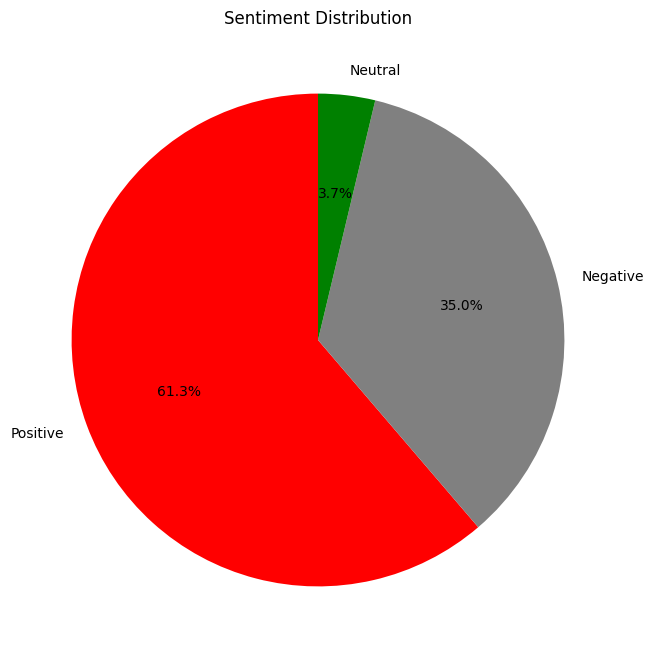

In [98]:
vaders['sentiment_category'] = pd.cut(vaders['compound'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])

# Count the occurrences of each sentiment category
sentiment_counts = vaders['sentiment_category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'gray', 'green'])
plt.title('Sentiment Distribution')
plt.show()